## Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## Read the CSV file and save it in a dataframe

In [2]:
df = pd.read_csv('loan.csv')
df.head()

C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Check the shape of the DataFrame

In [3]:
df.shape

(39717, 111)

## Check the null values in the DataFrame

In [4]:
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


# Data Cleaning

## 1. Drop all columns that have *all* the values as null

In [5]:
df = df.dropna(axis=1, thresh=1)

In [6]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

**Check how many unique values does each column have**

In [7]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

## 2. Drop the columns that have only 1 unique value as these would not be helpful to the analysis

In [8]:
df = df.drop(columns=list(df.loc[:, df.nunique() == 1].columns))
df.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec   

Since we would be using the column **funded_amnt_inv**, Check if we have any rows where **funded_amnt_inv** is greater than the **loan_amnt**, if exists, then remove these rows as they can be considered incorrect based on the business rule

In [9]:
df[df['funded_amnt_inv'] > df['loan_amnt']]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


## Identify the important variables that will be used in the analysis. 
The objective of the analysis is to identify a customer beforehand if he/she will be defaulted, and so we would be considering the customer demographics and not the ones that are decided after providing the loan

In [10]:
cols_considered = ['issue_d', 'funded_amnt_inv', 'int_rate', 'term', 'grade', 'sub_grade', 'annual_inc', 'dti',
                   'emp_length', 'home_ownership', 'loan_status', 'purpose', 'verification_status']

**Assumptions**: We have considered **funded_amnt_inv** as this would be the final amount that would be approved by the investors.

In [11]:
df = df[cols_considered]
df.head()

,issue_d,funded_amnt_inv,int_rate,term,grade,sub_grade,annual_inc,dti,emp_length,home_ownership,loan_status,purpose,verification_status
0,Dec-11,4975.0,10.65%,36 months,B,B2,24000.0,27.65,10+ years,RENT,Fully Paid,credit_card,Verified
1,Dec-11,2500.0,15.27%,60 months,C,C4,30000.0,1.00,< 1 year,RENT,Charged Off,car,Source Verified
2,Dec-11,2400.0,15.96%,36 months,C,C5,12252.0,8.72,10+ years,RENT,Fully Paid,small_business,Not Verified
3,Dec-11,10000.0,13.49%,36 months,C,C1,49200.0,20.00,10+ years,RENT,Fully Paid,other,Source Verified
4,Dec-11,3000.0,12.69%,60 months,B,B5,80000.0,17.94,1 year,RENT,Current,other,Source Verified


## Check the data types each column

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 13 columns):
issue_d                39717 non-null object
funded_amnt_inv        39717 non-null float64
int_rate               39717 non-null object
term                   39717 non-null object
grade                  39717 non-null object
sub_grade              39717 non-null object
annual_inc             39717 non-null float64
dti                    39717 non-null float64
emp_length             38642 non-null object
home_ownership         39717 non-null object
loan_status            39717 non-null object
purpose                39717 non-null object
verification_status    39717 non-null object
dtypes: float64(3), object(10)
memory usage: 3.9+ MB


## 3. Change the data types of any columns that are incorrect formatted

Pull Year and Month from issue_date

In [13]:
df['issue_month'] = df['issue_d'].apply(lambda x: x.split('-')[0])
df['issue_year'] = df['issue_d'].apply(lambda x: int(x.split('-')[1]))

In [14]:
#Map the months to numbers so that we can have a order time series. The current naming would cause a problem due to order of alpha.
df['issue_month'] = df['issue_month'].map({'Jan':1, 'Feb': 2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 
                                             'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})

Convert int_rate to float

In [15]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.replace('%', '')))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
issue_d                39717 non-null object
funded_amnt_inv        39717 non-null float64
int_rate               39717 non-null float64
term                   39717 non-null object
grade                  39717 non-null object
sub_grade              39717 non-null object
annual_inc             39717 non-null float64
dti                    39717 non-null float64
emp_length             38642 non-null object
home_ownership         39717 non-null object
loan_status            39717 non-null object
purpose                39717 non-null object
verification_status    39717 non-null object
issue_month            39717 non-null int64
issue_year             39717 non-null int64
dtypes: float64(4), int64(2), object(9)
memory usage: 4.5+ MB


In [17]:
df.head()

,issue_d,funded_amnt_inv,int_rate,term,grade,sub_grade,annual_inc,dti,emp_length,home_ownership,loan_status,purpose,verification_status,issue_month,issue_year
0,Dec-11,4975.0,10.65,36 months,B,B2,24000.0,27.65,10+ years,RENT,Fully Paid,credit_card,Verified,12,11
1,Dec-11,2500.0,15.27,60 months,C,C4,30000.0,1.00,< 1 year,RENT,Charged Off,car,Source Verified,12,11
2,Dec-11,2400.0,15.96,36 months,C,C5,12252.0,8.72,10+ years,RENT,Fully Paid,small_business,Not Verified,12,11
3,Dec-11,10000.0,13.49,36 months,C,C1,49200.0,20.00,10+ years,RENT,Fully Paid,other,Source Verified,12,11
4,Dec-11,3000.0,12.69,60 months,B,B5,80000.0,17.94,1 year,RENT,Current,other,Source Verified,12,11


Since the records which are currently paying the loan cannot help us determine whether they will finish the loan or will default it, we would be dropping such records

In [18]:
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [19]:
df.head()

,issue_d,funded_amnt_inv,int_rate,term,grade,sub_grade,annual_inc,dti,emp_length,home_ownership,loan_status,purpose,verification_status,issue_month,issue_year
0,Dec-11,4975.0,10.65,36 months,B,B2,24000.0,27.65,10+ years,RENT,Fully Paid,credit_card,Verified,12,11
1,Dec-11,2500.0,15.27,60 months,C,C4,30000.0,1.00,< 1 year,RENT,Charged Off,car,Source Verified,12,11
2,Dec-11,2400.0,15.96,36 months,C,C5,12252.0,8.72,10+ years,RENT,Fully Paid,small_business,Not Verified,12,11
3,Dec-11,10000.0,13.49,36 months,C,C1,49200.0,20.00,10+ years,RENT,Fully Paid,other,Source Verified,12,11
5,Dec-11,5000.0,7.90,36 months,A,A4,36000.0,11.20,3 years,RENT,Fully Paid,wedding,Source Verified,12,11


Separating the different types of columns, This would make it a easy for quick references

In [20]:
cont_cols = ['funded_amnt_inv', 'int_rate', 'annual_inc', 'dti']
cat_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'loan_status', 'purpose', 'verification_status']
datetime_cols = ['issue_d', 'issue_month', 'issue_year']

Adding a column for counter which will be set to 1 as this can be used to get value counts

In [21]:
df['counter'] = 1

# Outlier handeling

In [22]:
df.describe()[cont_cols]

,funded_amnt_inv,int_rate,annual_inc,dti
count,38577.000000,38577.000000,3.857700e+04,38577.000000
mean,10222.481123,11.932219,6.877797e+04,13.272727
std,7022.720644,3.691327,6.421868e+04,6.673044
min,0.000000,5.420000,4.000000e+03,0.000000
25%,5000.000000,8.940000,4.000000e+04,8.130000
50%,8733.440000,11.710000,5.886800e+04,13.370000
75%,14000.000000,14.380000,8.200000e+04,18.560000
max,35000.000000,24.400000,6.000000e+06,29.990000


**Assumption**: We are considering the minimum amount invested as 500

In [23]:
df = df[df['funded_amnt_inv'] >= 500]

In [24]:
df.describe()[cont_cols]

,funded_amnt_inv,int_rate,annual_inc,dti
count,38281.000000,38281.000000,3.828100e+04,38281.000000
mean,10300.442912,11.942353,6.882996e+04,13.286999
std,6993.395882,3.699927,6.429599e+04,6.671305
min,500.000000,5.420000,4.000000e+03,0.000000
25%,5000.000000,8.940000,4.000000e+04,8.150000
50%,8842.750441,11.780000,5.900000e+04,13.380000
75%,14050.000000,14.420000,8.200000e+04,18.570000
max,35000.000000,24.400000,6.000000e+06,29.990000


Create boxplots to understand the spread of the continuous variables in our data

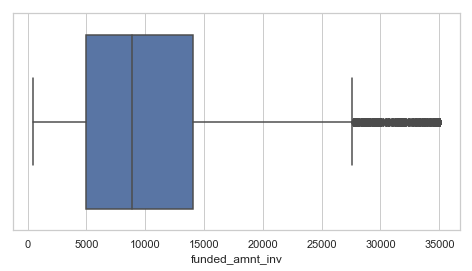

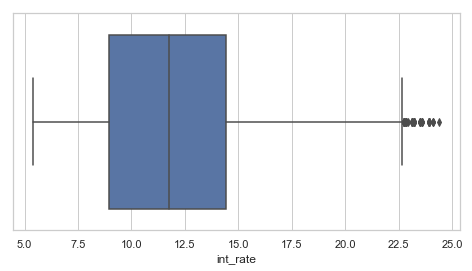

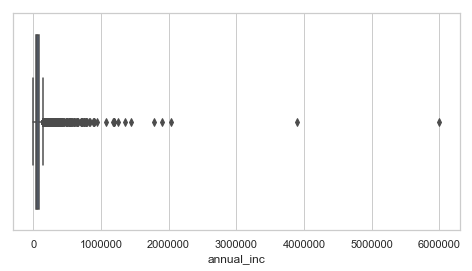

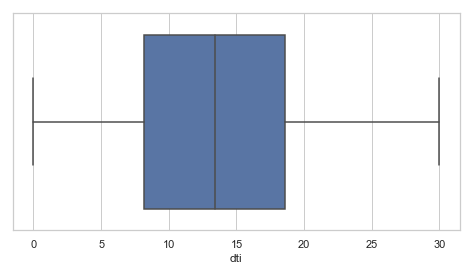

In [25]:
for cols in cont_cols:
    plt.figure(figsize=[8,4])
    sns.boxplot(df[cols])
    plt.show()

In [26]:
df['annual_inc'].median()

59000.0

In [27]:
df['annual_inc'].max()

6000000.0

In [28]:
df['annual_inc'].max() - df['annual_inc'].median()

5941000.0

`DTI columns looks to be well spread while the others have some outliers. annual_inc has some outliers that need that are ~100* that of the median and this needs to be removed`

In [29]:
q90 = np.quantile(df['annual_inc'], 0.95)
q90

140004.0

**Assumptions**: We are considering 96% to be the outliers and so these will be removed from the analysis

In [30]:
df = df[df['annual_inc'] < q90]

# Univariate Analysis

Plotting the box plot again

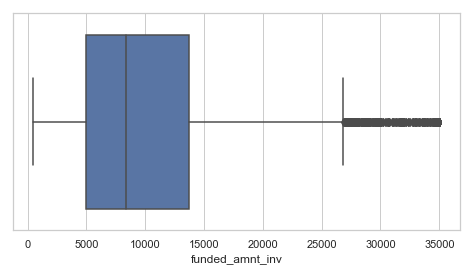

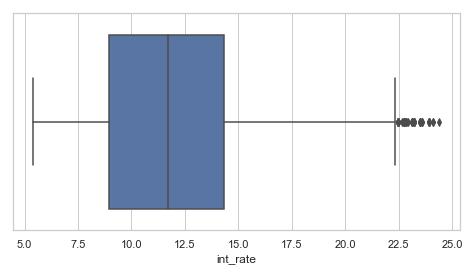

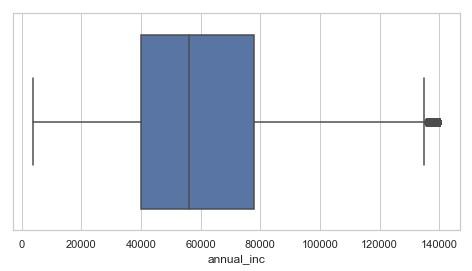

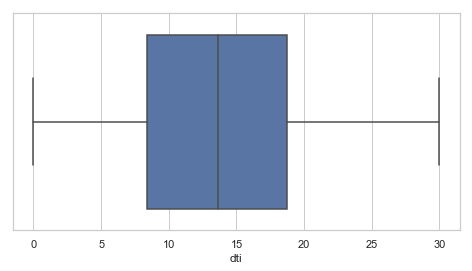

In [31]:
for cols in cont_cols:
    plt.figure(figsize=[8,4])
    sns.boxplot(df[cols])
    plt.show()

`The numbers look well spread across all 4 columns; funded_amnt_inv still have some outliers but siince they are not far away from the upper whisker, we will not remove these.`

C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


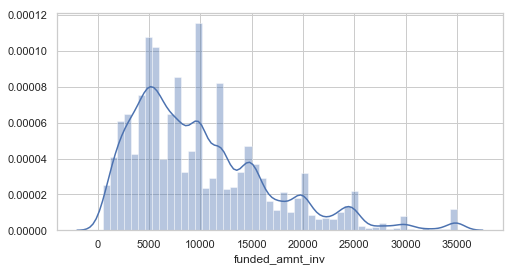

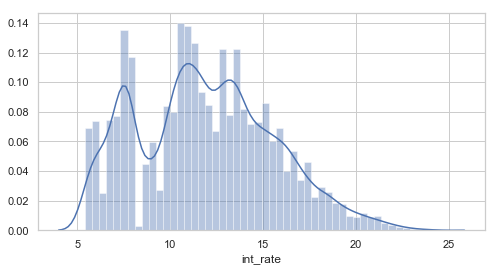

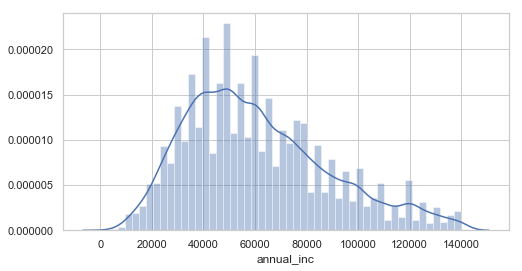

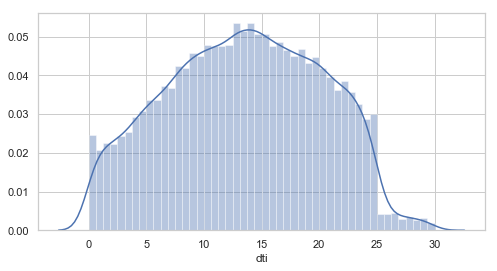

In [32]:
for cols in cont_cols:
    plt.figure(figsize=[8,4])
    sns.distplot(df[cols])
    plt.show()

`The distplot shows a normal curve in almost all the columns and so we can conclude that all the outliers have been addressed in continuos variables `

In [33]:
df.describe()[cont_cols]

,funded_amnt_inv,int_rate,annual_inc,dti
count,36357.000000,36357.000000,36357.000000,36357.000000
mean,9969.457727,11.897595,60875.582166,13.461168
std,6700.511614,3.676103,27725.598552,6.660011
min,500.000000,5.420000,4000.000000,0.000000
25%,5000.000000,8.940000,40000.000000,8.360000
50%,8400.000000,11.710000,56000.000000,13.600000
75%,13725.000000,14.350000,78000.000000,18.720000
max,35000.000000,24.400000,140000.000000,29.990000


## Inference:
**The Lending club provides a loan of upto 500 - 35000 and can be applied by individuals with annual income of as low as 4000**

## Look at the spread of values in the categorical variables

In [34]:
#cat_cols = 'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'loan_status', 'purpose', 'verification_status'

for cols in cat_cols:
    print(cols)
    print(100*df[cols].value_counts(1), end='\n*****************************\n\n')

term
 36 months    75.443518
 60 months    24.556482
Name: term, dtype: float64
*****************************

grade
B    30.288528
A    26.355310
C    20.306956
D    13.194158
E     6.705724
F     2.431444
G     0.717881
Name: grade, dtype: float64
*****************************

sub_grade
A4    7.506120
B3    7.247573
A5    7.110048
B5    6.801991
B4    6.367412
C1    5.322221
B2    5.181946
C2    5.041670
A3    4.769370
B1    4.689606
A2    3.968974
C3    3.845202
D2    3.333608
C4    3.124570
A1    3.000798
C5    2.973293
D3    2.901780
D1    2.414941
D4    2.373683
D5    2.170146
E1    1.848337
E2    1.548533
E3    1.292736
E4    1.075446
E5    0.940672
F1    0.756388
F2    0.594108
F3    0.429078
F4    0.382320
F5    0.269549
G1    0.242044
G2    0.181533
G4    0.123773
G3    0.110020
G5    0.060511
Name: sub_grade, dtype: float64
*****************************

emp_length
10+ years    22.184812
< 1 year     12.050136
2 years      11.512562
3 years      10.762789
4 years       8.98

`There are no null values in the categorical columns and they looks well spread across the various categories.`

`Let's take a look at some graphs that will help us understand better`

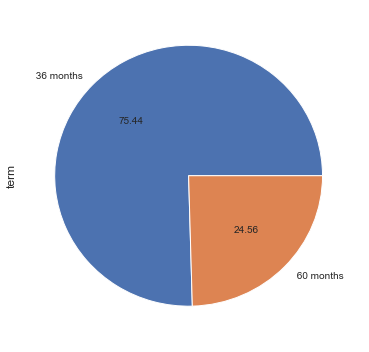

In [35]:
plt.figure(figsize=[6,6])
df['term'].value_counts().plot(kind='pie', autopct='%.2f', fontsize=10)
plt.show()

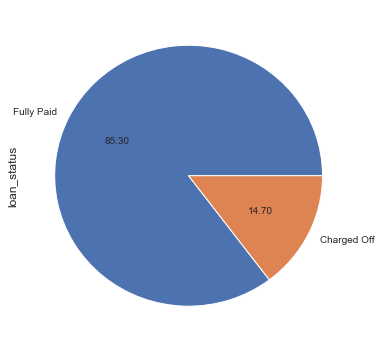

In [36]:
plt.figure(figsize=[6,6])
df['loan_status'].value_counts().plot(kind='pie', autopct='%.2f', fontsize=10)
plt.show()

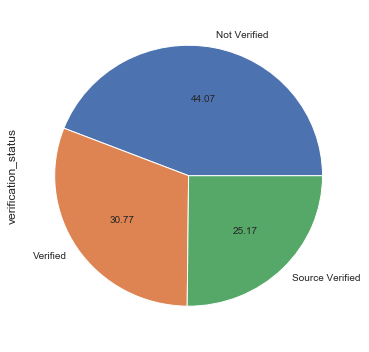

In [37]:
plt.figure(figsize=[6,6])
df['verification_status'].value_counts().plot(kind='pie', autopct='%.2f', fontsize=10)
plt.show()

- The loan provides 36 months and 60 months tenure, of which ~75.5% customers opt of 36 months
- The customer documents can either be Verified, Source Verified (verified by 3rd party), or not verified. In the data, 44% customers have thier documents as not verified while the others have it verified at source (25%) or verified (30%)



- A total of 14.7% customer are defaulted and have not paid their loan.

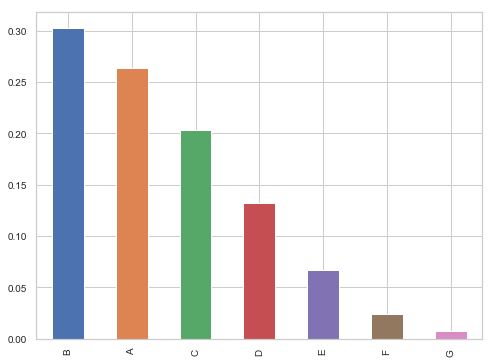

In [38]:
plt.figure(figsize=[8,6])
df['grade'].value_counts(normalize=True).plot(kind='bar', fontsize=10)
plt.show()

`76% of the total loan takers are from Grade A, B, or C`

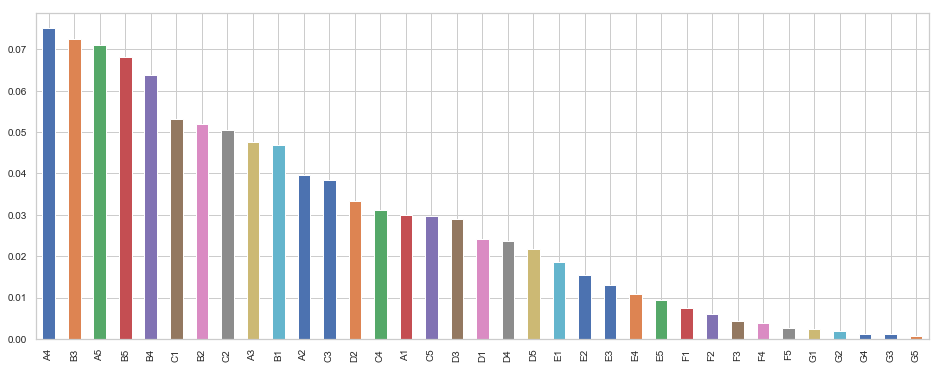

In [39]:
plt.figure(figsize=[16,6])
df['sub_grade'].value_counts(normalize=True).plot(kind='bar', fontsize=10)
plt.show()

`There is a good spread of data across the different sub-grades, and the trend matches the one seen for grades`

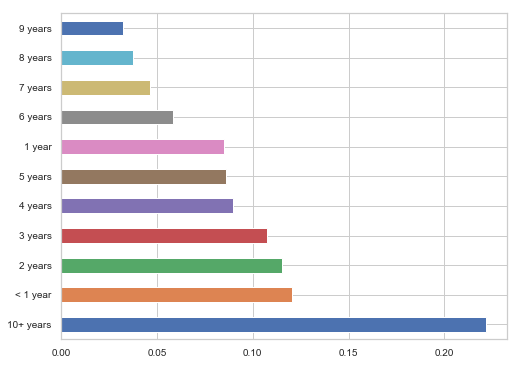

In [40]:
plt.figure(figsize=[8,6])
df['emp_length'].value_counts(normalize=True).plot(kind='barh', fontsize=10)
plt.show()

`49% of the customers have employment length of 5 year or less, whereas 22% have 10 years or more.`

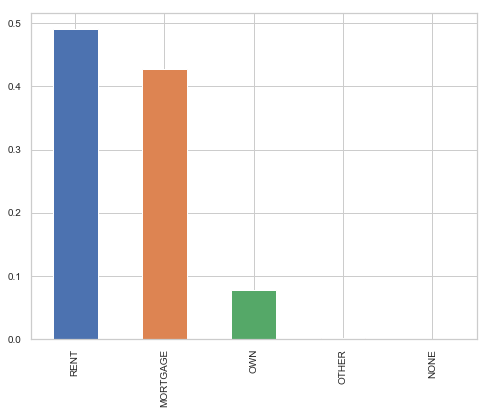

In [41]:
plt.figure(figsize=[8,6])
df['home_ownership'].value_counts(normalize=True).plot(kind='bar', fontsize=10)
plt.show()

`92% of the customers pay either rent or mortgage on their current residence`

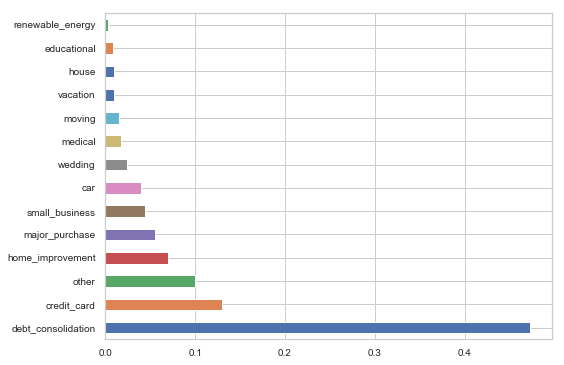

In [42]:
plt.figure(figsize=[8,6])
df['purpose'].value_counts(normalize=True).plot(kind='barh', fontsize=10)
plt.show()

`~60% of loan is taken for either debt consolidation (47.3%) or credit card settlements.`

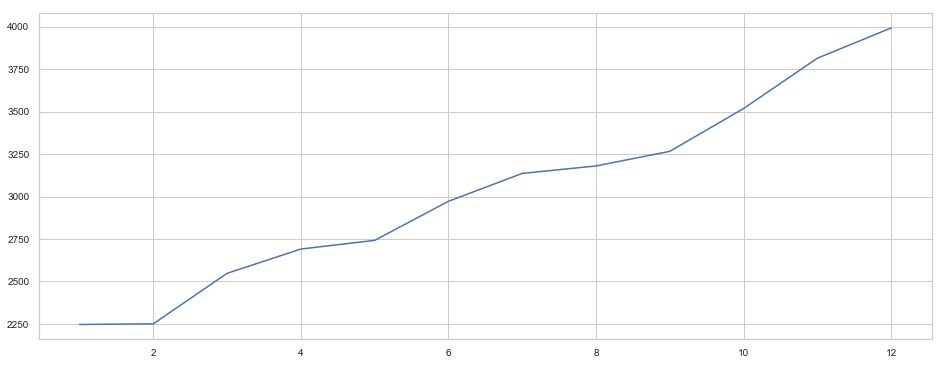

In [43]:
plt.figure(figsize=[16,6])
df['issue_month'].value_counts().plot(kind='line', fontsize=10)
plt.show()

`More number of customers take a loan towards the end of the calender year and that is why we see an increase in distribution towards the last quarter.`

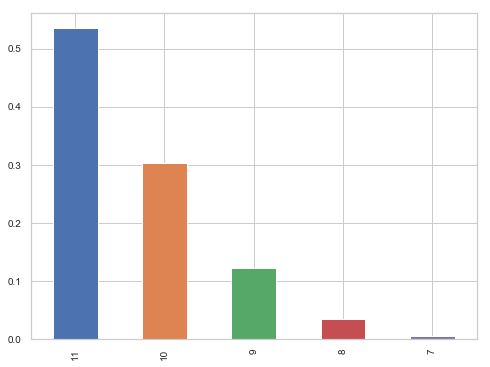

In [44]:
plt.figure(figsize=[8,6])
df['issue_year'].value_counts(normalize=True).plot(kind='bar', fontsize=10)
plt.show()

`Each year the number of customers taking loans increases and the dataset has a correct representation of it.`

# Bivariate Analysis

#### Year-Month analysis

In [45]:
df_temp = 100*df.groupby(['issue_month'])['issue_year'].value_counts().unstack()
df_temp

issue_year,7,8,9,10,11
issue_month,,,,,
1,NaN,14600.0,22700.0,55400.0,132000.0
2,NaN,16800.0,25000.0,59200.0,124100.0
3,NaN,22200.0,26700.0,69800.0,136100.0
4,NaN,12500.0,28000.0,79100.0,149500.0
5,NaN,2300.0,30500.0,88600.0,152800.0
6,100.0,2900.0,33800.0,98700.0,161700.0
7,1800.0,3000.0,35500.0,108300.0,165000.0
8,2700.0,3400.0,39100.0,102800.0,170000.0
9,1100.0,1200.0,42500.0,102800.0,179000.0


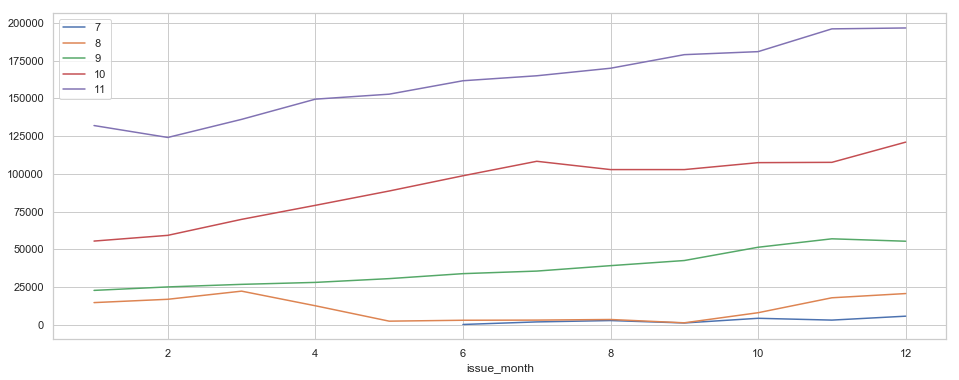

In [46]:
plt.figure(figsize=[16,6])
sns.lineplot(data=df_temp, dashes=False)
plt.show()

`Except the years 2007 and 2008, the numbers of loan taken through-out the year sees a linear rise in the number month-over-month.`

#### Purpose of loan vs Month

In [47]:
df_temp = 100*df.groupby(['issue_month'])['purpose'].value_counts().unstack()
df_temp

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
issue_month,,,,,,,,,,,,,,
1,9100,30000,112000,2300,10500,2400,12200,4000,2100,21000,200,11400,1600,5900
2,10100,29400,111300,2900,11900,2300,11600,3200,1800,21600,200,12100,1500,5200
3,13600,32000,115300,2000,18700,3200,15300,4100,2800,24700,700,13700,2300,6400
4,13200,32100,115700,2600,22100,2800,18300,4600,4000,32200,800,11000,2700,7000
5,12800,32100,124700,2600,24500,2400,16800,6500,3800,26800,700,11300,3700,5500
6,12200,32300,129100,3100,27100,2400,21300,5600,4300,35600,1000,11000,3700,8500
7,10600,35600,142300,2800,24200,2400,23300,4600,7200,34800,700,12800,4000,8300
8,13000,38300,153100,2100,22100,2100,16500,4500,7400,32900,800,13800,3200,8200
9,13600,37900,158200,2300,24900,3900,16800,7200,6400,28600,1100,13600,2800,9300


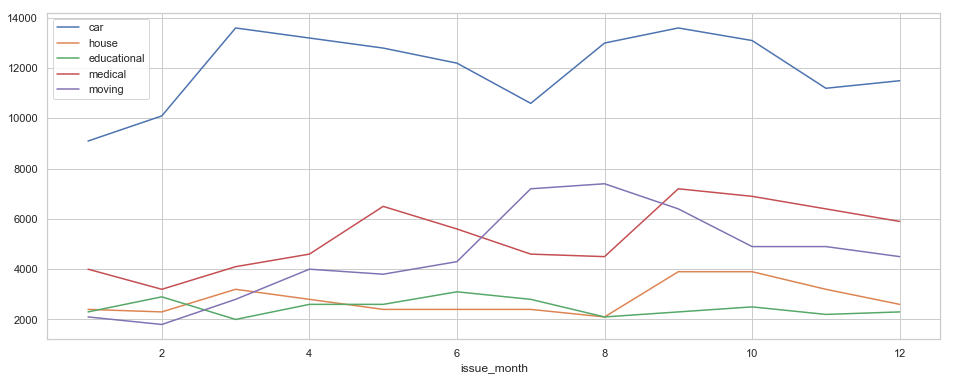

In [48]:
plt.figure(figsize=[16,6])
sns.lineplot(data=df_temp[['car', 'house', 'educational', 'medical', 'moving']], dashes=False)
plt.show()

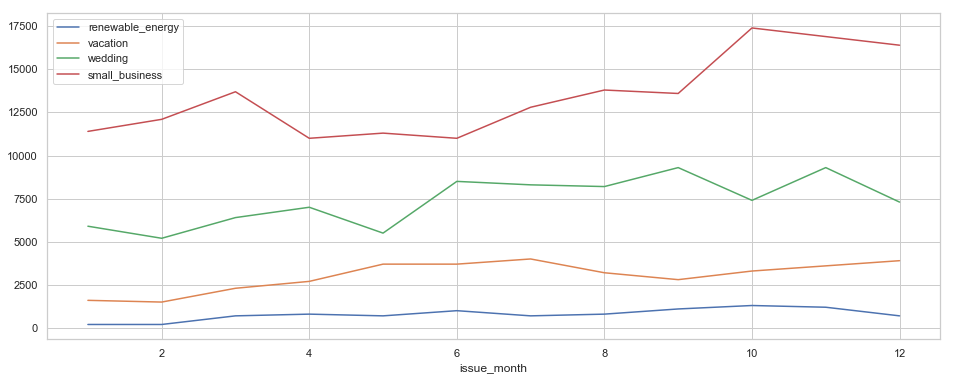

In [49]:
plt.figure(figsize=[16,6])
sns.lineplot(data=df_temp[['renewable_energy', 'vacation', 'wedding', 'small_business']], dashes=False)
plt.show()

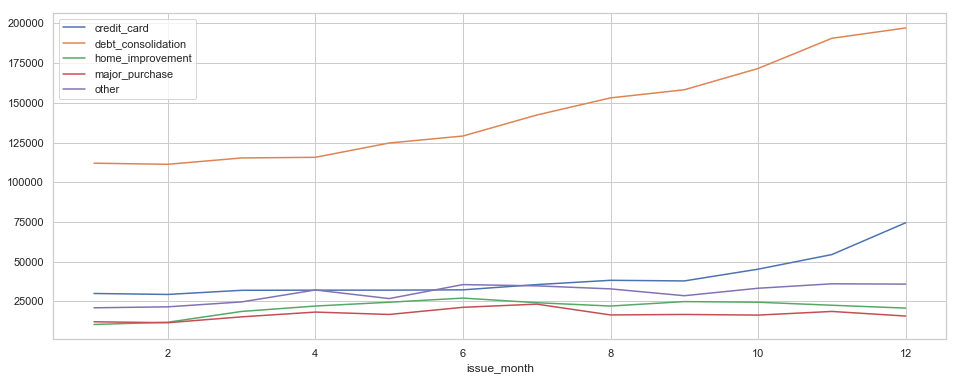

In [50]:
plt.figure(figsize=[16,6])
sns.lineplot(data=df_temp[['credit_card', 'debt_consolidation', 'home_improvement', 'major_purchase', 'other']], dashes=False)
plt.show()

`We see a massive surge in loans for Credit card and debt consolidation towards the end of the year as compared to the rest of the year and this can be attributed to the idea of having a good credit score towards the end of the year.`

#### Grade vs Interest rates

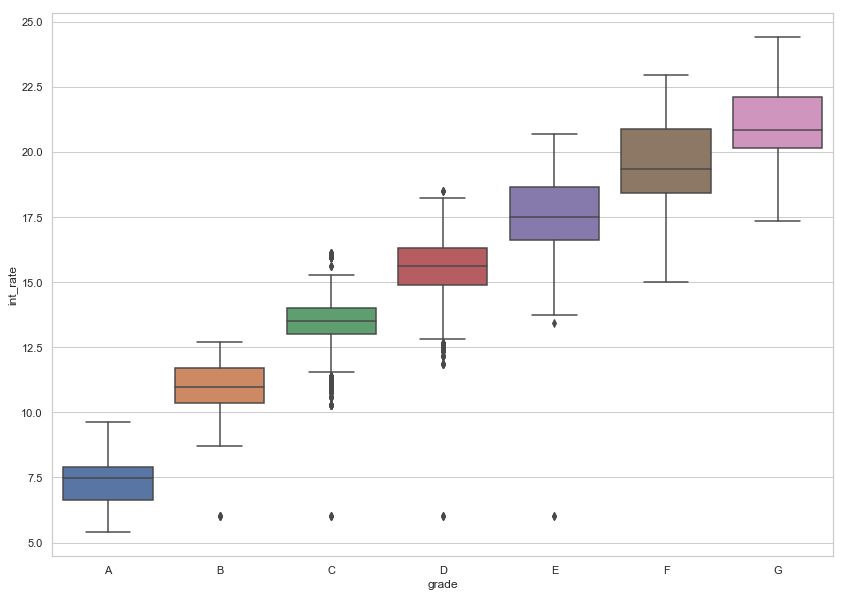

In [51]:
plt.figure(figsize=[14,10])
sns.boxplot(data=df, x='grade', y='int_rate', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

`The interest rate provided to a customer is directly dependent on the grade`

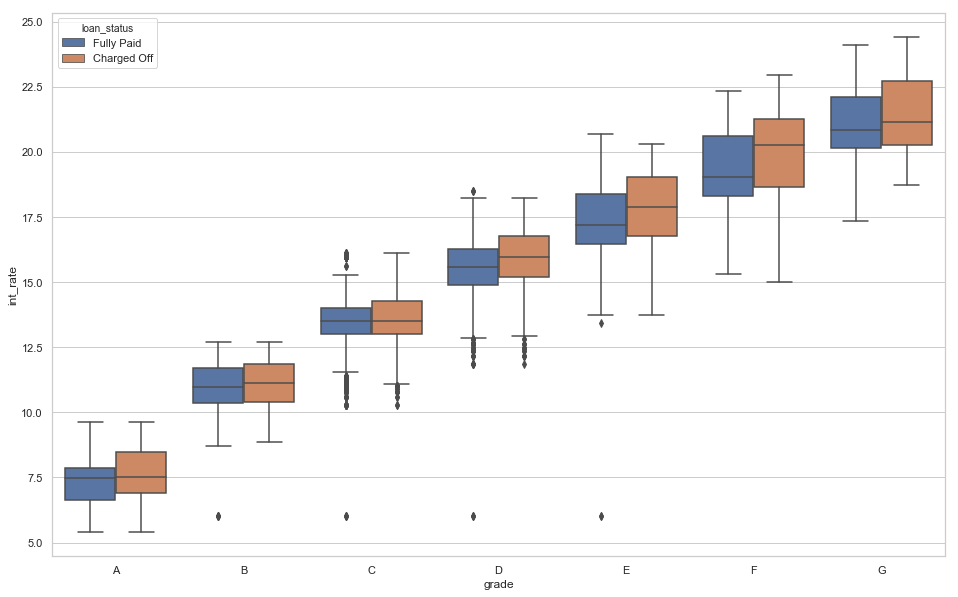

In [52]:
plt.figure(figsize=[16,10])
sns.boxplot(data=df, x='grade', y='int_rate', hue='loan_status', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

- The interest rates that the defaulters received was usually higher than the fully paid.
- For Grade A, B,and C, even though the interest rates provided were higher, they had almost a similar median.
- For Grades D-G, Q1, Q3 and median are all higher for defaulters than the fully paid.

#### Loan status vs Grade

In [53]:
df_temp = 100*df.groupby('loan_status')['grade'].value_counts(normalize=True).unstack()
df_temp

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,11.019645,25.275959,24.340505,19.906455,12.291862,5.388213,1.777362
Fully Paid,28.998452,31.152457,19.611763,12.037276,5.742938,1.921837,0.535277


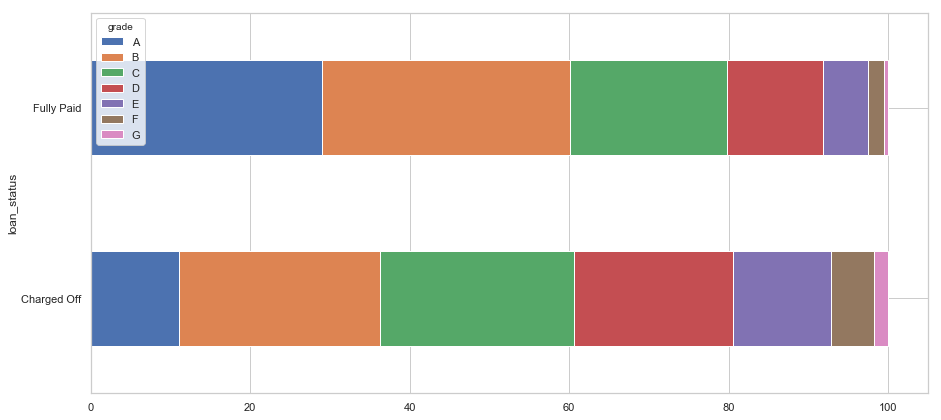

In [54]:
df_temp.plot.barh(width=0.5, stacked=True)
plt.gcf().set_size_inches(15, 7)
plt.show()

In [55]:
df_temp_T = df_temp.div(df_temp.sum(axis=0), axis=1)*100
df_temp_T

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,27.536653,44.792962,55.379406,62.317251,68.156352,73.709664,76.854289
Fully Paid,72.463347,55.207038,44.620594,37.682749,31.843648,26.290336,23.145711


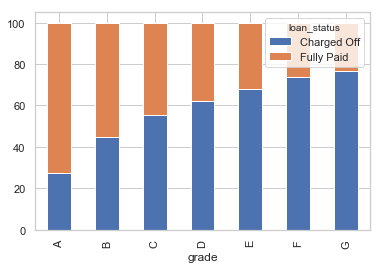

In [56]:
df_temp_T.T.plot.bar(width=0.5, stacked=True)
plt.show()

`As we move down from Grade A to G, the contribtuion of defaulters wihtin each grade contines to increase.`
- We can conclude that lower the grade, higher the default rate
- Most of the defaulters are from grade B to E

In [57]:
df_temp = 100*df.groupby('loan_status')['sub_grade'].value_counts(normalize=True).unstack()
df_temp = df_temp.T
df_temp['delta'] = df_temp['Charged Off'] - df_temp['Fully Paid']
df_temp

loan_status,Charged Off,Fully Paid,delta
sub_grade,,,
A1,0.561272,3.421256,-2.859984
A2,1.384471,4.414420,-3.029949
A3,1.889616,5.265704,-3.376087
A4,3.217961,8.245195,-5.027235
A5,3.966324,7.651877,-3.685553
B1,3.086997,4.965820,-1.878822
B2,3.985033,5.388237,-1.403204
B3,5.930776,7.474526,-1.543750
B4,5.855940,6.455566,-0.599625


<Figure size 1152x432 with 0 Axes>

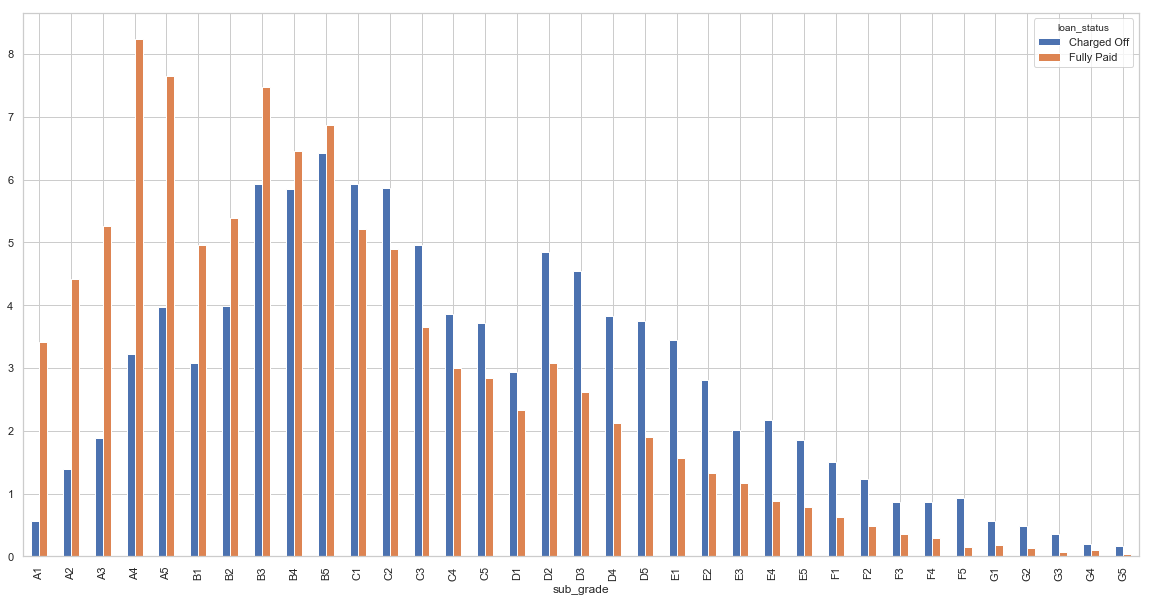

In [58]:
df_temp = 100*df.groupby('loan_status')['sub_grade'].value_counts(normalize=True).unstack()
df_temp = df_temp.T

plt.figure(figsize=[16,6])
df_temp.plot(kind='bar')
plt.gcf().set_size_inches(20, 10)
plt.show()

In [59]:
df_temp = 100*df.groupby('sub_grade')['loan_status'].value_counts(normalize=True).unstack()
df_temp


loan_status,Charged Off,Fully Paid
sub_grade,,
A1,2.749771,97.250229
A2,5.128205,94.871795
A3,5.824683,94.175317
A4,6.302675,93.697325
A5,8.201161,91.798839
B1,9.677419,90.322581
B2,11.305732,88.694268
B3,12.030361,87.969639
B4,13.520518,86.479482


<Figure size 1152x432 with 0 Axes>

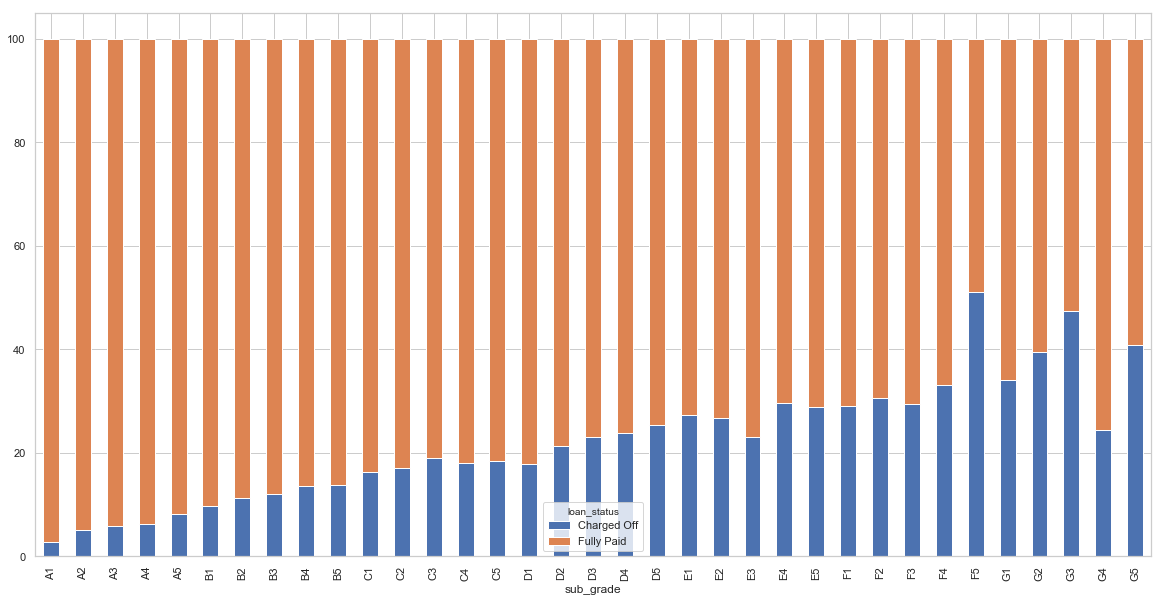

In [60]:
plt.figure(figsize=[16,6])
df_temp.plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(20, 10)
plt.show()

`The contribution of defaulters drastically increases from sub-grade C2 onwards, with F having 51% defaulter rate`

#### Loan status vs Purpose

In [61]:
df_temp = 100*df.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack()
df_temp.sort_values(by=['Charged Off'], ascending=False)

loan_status,Charged Off,Fully Paid
purpose,,
small_business,27.881041,72.118959
renewable_energy,19.148936,80.851064
educational,17.508418,82.491582
moving,16.451017,83.548983
house,16.369048,83.630952
medical,16.220472,83.779528
other,16.203576,83.796424
debt_consolidation,15.386403,84.613597
vacation,14.325069,85.674931


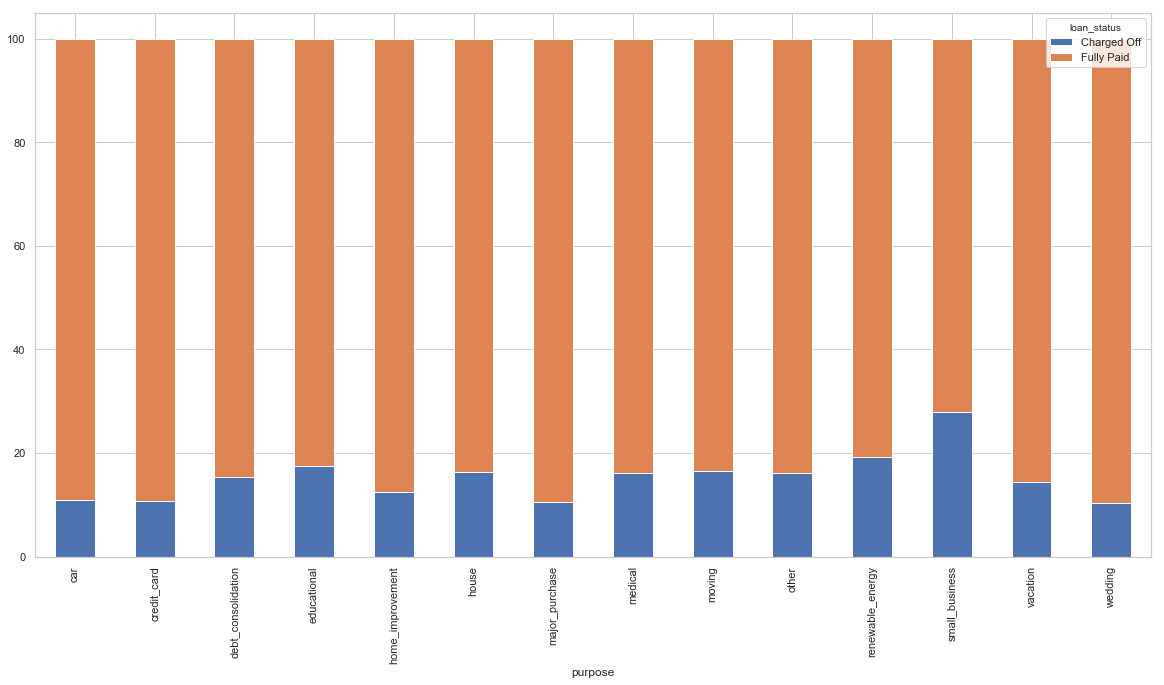

In [62]:
df_temp.plot.bar(width=0.5, stacked=True)
plt.gcf().set_size_inches(20, 10)
plt.show()

In [63]:
df_temp = 100*df.groupby('loan_status')['purpose'].value_counts(normalize=True).unstack()
df_temp = df_temp.T
df_temp.sort_values(by=['Charged Off'], ascending=False)

loan_status,Charged Off,Fully Paid
purpose,,
debt_consolidation,49.541628,46.956017
other,11.019645,9.822004
credit_card,9.560337,13.636657
small_business,8.419083,3.753386
home_improvement,5.912067,7.168193
major_purchase,3.985033,5.859022
car,2.956034,4.133884
medical,1.927035,1.715465
wedding,1.702526,2.553850


`27.9% Customers who take loan for small business tend to default and they make up 8.5% of the total defaulters, 17 pts higher than education which is the lowest at 10.3%`

#### Loan status vs Date

In [64]:
df_temp = 100*df.groupby('issue_year')['issue_month'].value_counts(normalize=True).unstack()
df_temp

issue_month,1,2,3,4,5,6,7,8,9,10,11,12
issue_year,,,,,,,,,,,,
7,NaN,NaN,NaN,NaN,NaN,0.540541,9.729730,14.594595,5.945946,22.702703,16.216216,30.270270
8,11.661342,13.418530,17.731629,9.984026,1.837061,2.316294,2.396166,2.715655,0.958466,6.309904,14.217252,16.453674
9,5.074894,5.589090,5.969148,6.259781,6.818690,7.556450,7.936508,8.741337,9.501453,11.468813,12.720769,12.363067
10,5.033161,5.378396,6.341419,7.186336,8.049423,8.967021,9.839193,9.339511,9.339511,9.757427,9.775597,10.993004
11,6.790123,6.383745,7.001029,7.690329,7.860082,8.317901,8.487654,8.744856,9.207819,9.310700,10.087449,10.118313


#### Loan status vs term

In [65]:
df_temp = 100*df.groupby('term')['loan_status'].value_counts(normalize=True).unstack()
df_temp

loan_status,Charged Off,Fully Paid
term,,
36 months,11.090452,88.909548
60 months,25.795251,74.204749


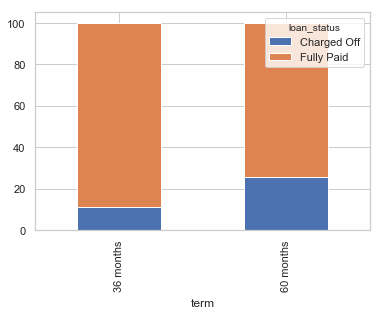

In [66]:
df_temp.plot.bar(width=0.5, stacked=True)
plt.show()

In [67]:
df_temp = 100*df.groupby('loan_status')['term'].value_counts(normalize=True).unstack()
df_temp.T

loan_status,Charged Off,Fully Paid
term,,
36 months,56.913003,78.637302
60 months,43.086997,21.362698


`25.7% of the customers who opt for 60 months tenure end up to be defaulters and the make up 43% of the total defaulters.`

#### Loan status vs Employment length

In [68]:
df_temp = 100*df.groupby('emp_length')['loan_status'].value_counts(normalize=True).unstack()
df_temp

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,14.500000,85.500000
10+ years,16.082132,83.917868
2 years,13.295650,86.704350
3 years,14.011567,85.988433
4 years,13.664987,86.335013
5 years,14.370468,85.629532
6 years,13.952358,86.047642
7 years,15.328020,84.671980
8 years,14.663643,85.336357


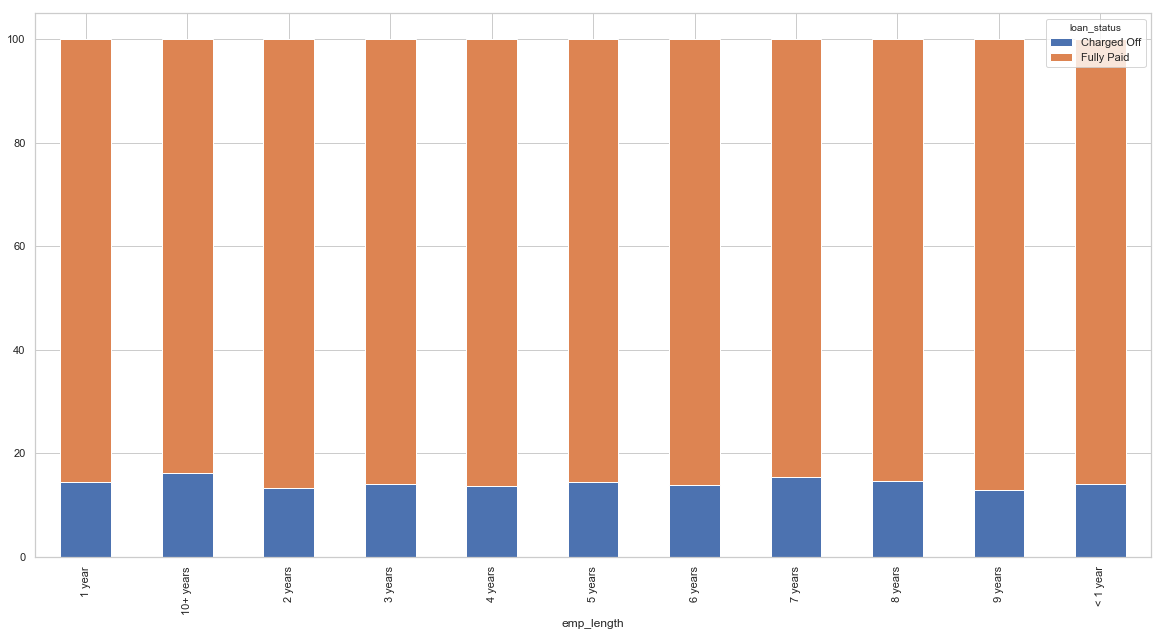

In [69]:
df_temp.plot(kind='bar', width=0.5, stacked=True)
plt.gcf().set_size_inches(20, 10)
plt.show()

In [70]:
df_temp = 100*df.groupby('loan_status')['emp_length'].value_counts(normalize=True).unstack()
df_temp

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_status,,,,,,,,,,,
Charged Off,8.496094,24.628906,10.566406,10.410156,8.476562,8.515625,5.605469,4.882812,3.789062,2.890625,11.738281
Fully Paid,8.486633,21.770778,11.672843,10.822525,9.072260,8.595818,5.856273,4.569217,3.735442,3.315246,12.102965


`While the spread of completed and defaulters are pretty much even across all employment length, 16% defaulters in 10+ years being the highest and contributing 24% to the overall defaulter contribution.`

#### Loan status vs home ownership

In [71]:
df_temp = df[df['home_ownership'] != 'NONE']
df_temp = 100*df_temp.groupby('home_ownership')['loan_status'].value_counts(normalize=True).unstack()
df_temp

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,13.879072,86.120928
OTHER,18.604651,81.395349
OWN,15.178256,84.821744
RENT,15.325649,84.674351


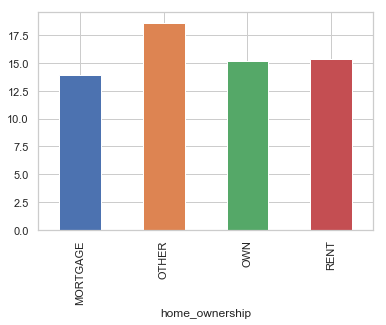

In [72]:
df_temp['Charged Off'].plot(kind='bar', width=0.5, stacked=True)
plt.show()

In [73]:
df_temp = df[df['home_ownership'] != 'NONE']
df_temp = 100*df_temp.groupby('loan_status')['home_ownership'].value_counts(normalize=True).unstack()
df_temp

home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
Charged Off,40.411600,0.299345,8.044902,51.244153
Fully Paid,43.222935,0.225741,7.749363,48.801961


`While the distribution of home owners remain almost the same across charged-off and Fully paid, we see higher number of customers who mention OTHER to be defaulters.`

#### Loan status vs verification status

In [74]:
df_temp = 100*df.groupby('verification_status')['loan_status'].value_counts(normalize=True).unstack()
df_temp

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,12.689595,87.310405
Source Verified,15.005464,84.994536
Verified,17.334168,82.665832


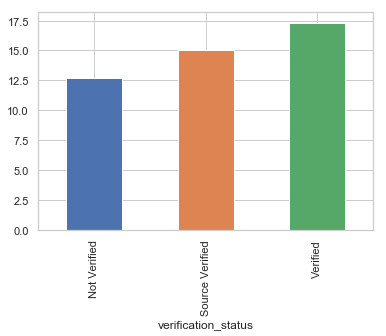

In [75]:
df_temp['Charged Off'].plot(kind='bar', width=0.5)
plt.show()

In [76]:
df_temp = 100*df.groupby('loan_status')['verification_status'].value_counts(normalize=True).unstack()
df_temp

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,38.035547,25.687558,36.276894
Fully Paid,45.105121,25.077389,29.817490


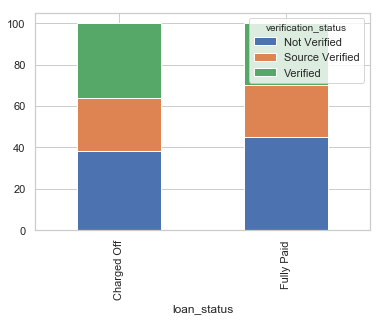

In [77]:
df_temp.plot(kind='bar', width=0.5, stacked=True)
plt.show()

`17% of the verified customers are defaulters and contribute 36% of the total defaulters.`

#### Loan status vs interest rates

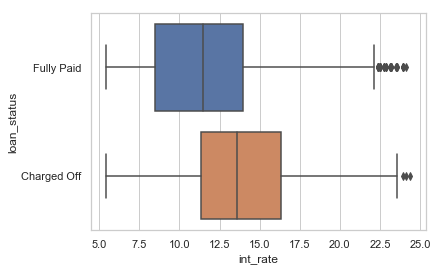

In [78]:
sns.boxplot(data=df, x='int_rate', y='loan_status')
plt.show()

`Defualters are mostly the ones with higher interest rates as the median of the fully paid is Q1 of charged-off.`

#### Loan status vs annual income

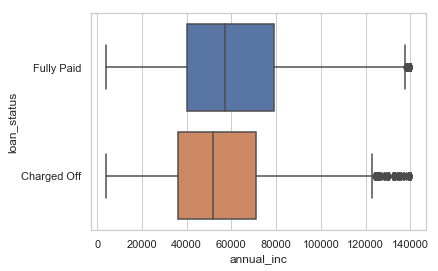

In [79]:
sns.boxplot(data=df, x='annual_inc', y='loan_status')
plt.show()

`Maximum annual income of charged-off for 75% of population is somewhere around 70000 and is 10000 less than the fully paid. the median of these customers is also on the lower end.`

#### Loan status vs funded amount

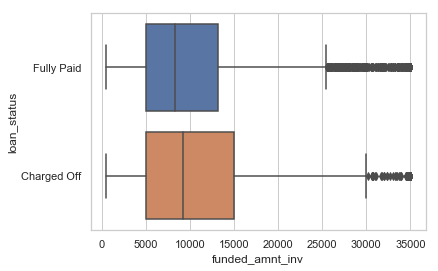

In [80]:
sns.boxplot(data=df, x='funded_amnt_inv', y='loan_status')
plt.show()

`The gap between the upper whiskers of fully paid and charged off is huge along with the size of the box plot. It looks like people who take a higher loan are more likely to default.`

#### Loan status vs dti

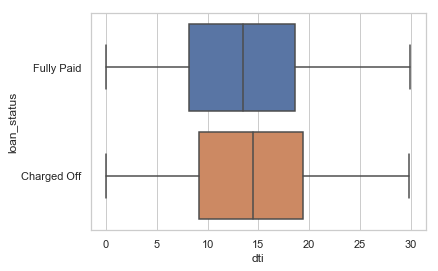

In [81]:
sns.boxplot(data=df, x='dti', y='loan_status')
plt.show()

`The DTI (Debt to Income ratio) for the fully paid and charged off customers are almost the same and it cannot be used to draw conclusions`

# Multi-variate analysis

In [82]:
df_temp = df.groupby(['purpose', 'grade'])['loan_status'].value_counts().unstack()
df_temp['Total'] = df_temp.sum(axis=1)
df_temp

loan_status               Charged Off  Fully Paid   Total
purpose            grade                                 
car                A             32.0       546.0   578.0
                   B             55.0       396.0   451.0
                   C             35.0       192.0   227.0
                   D             24.0        95.0   119.0
                   E              7.0        46.0    53.0
                   F              4.0         6.0    10.0
                   G              1.0         1.0     2.0
credit_card        A             62.0      1279.0  1341.0
                   B            143.0      1399.0  1542.0
                   C            140.0       838.0   978.0
                   D             88.0       447.0   535.0
                   E             56.0       181.0   237.0
                   F             19.0        68.0    87.0
                   G              3.0        17.0    20.0
debt_consolidation A            237.0      3497.0  3734.0
                   B            613.0      4622.0  5235.0
                   C            619.0      3013.0  3632.0
                   D            566.0      2008.0  2574.0
                   E            376.0      1007.0  1383.0
                   F            184.0       325.0   509.0
                   G             53.0        90.0   143.0
educational        A              4.0        70.0    74.0
                   B             18.0        75.0    93.0
                   C             14.0        71.0    85.0
                   D              9.0        19.0    28.0
                   E              6.0         7.0    13.0
                   F              1.0         2.0     3.0
                   G              NaN         1.0     1.0
home_improvement   A             39.0       830.0   869.0
                   B             89.0       676.0   765.0
...                               ...         ...     ...
other              F             18.0        47.0    65.0
                   G              8.0         9.0    17.0
renewable_energy   A              5.0        22.0    27.0
                   B              6.0        28.0    34.0
                   C              5.0        12.0    17.0
                   D              NaN         8.0     8.0
                   E              NaN         4.0     4.0
                   F              1.0         2.0     3.0
                   G              1.0         NaN     1.0
small_business     A             40.0       288.0   328.0
                   B            112.0       303.0   415.0
                   C             93.0       216.0   309.0
                   D             90.0       173.0   263.0
                   E             63.0       110.0   173.0
                   F             32.0        49.0    81.0
                   G             20.0        25.0    45.0
vacation           A             13.0       117.0   130.0
                   B             21.0        96.0   117.0
                   C              8.0        55.0    63.0
                   D              2.0        28.0    30.0
                   E              8.0        12.0    20.0
                   F              NaN         2.0     2.0
                   G              NaN         1.0     1.0
wedding            A              8.0       231.0   239.0
                   B             24.0       237.0   261.0
                   C             24.0       162.0   186.0
                   D             19.0       107.0   126.0
                   E             10.0        39.0    49.0
                   F              4.0        14.0    18.0
                   G              2.0         2.0     4.0

[98 rows x 3 columns]

In [83]:
#Since there are many lower values, we would only be considering the a category if 10 or more loan were taken
df_temp = df_temp[df_temp['Total'] >= 50]

In [84]:
df_temp['Charged Off'] = df_temp['Charged Off']/df_temp['Total'] *100
df_temp['Fully Paid'] = df_temp['Fully Paid']/df_temp['Total'] *100

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


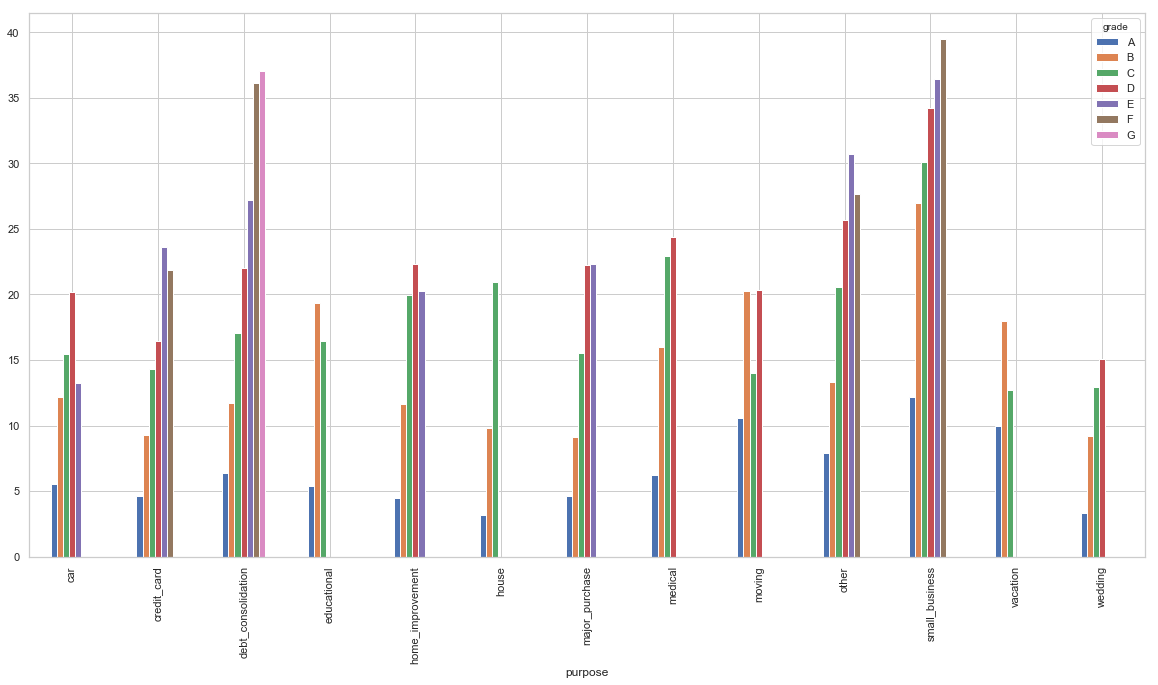

In [85]:
#df_temp = df_temp.unstack()
df_temp['Charged Off'].unstack().plot(kind='bar')
plt.gcf().set_size_inches(20, 10)

In [86]:
df_temp = df_temp[df_temp['Charged Off'] > 30]
df_temp = df_temp.reorder_levels(['grade', 'purpose'])
df_temp.sort_index()

loan_status               Charged Off  Fully Paid  Total
grade purpose                                           
C     small_business        30.097087   69.902913  309.0
D     small_business        34.220532   65.779468  263.0
E     other                 30.687831   69.312169  189.0
      small_business        36.416185   63.583815  173.0
F     debt_consolidation    36.149312   63.850688  509.0
      small_business        39.506173   60.493827   81.0
G     debt_consolidation    37.062937   62.937063  143.0

#### We are currently checking if default rate > 30% and there are atleast 50 customers in a category
- Loans for small business taken by grade C, D, E and F are most likely to default, with highest default from grade F at 39.5%
- Loans for debt consolidation taken by grade F, G are likely to default with 36.1% and 37% respectively.
- Loans taken for other expenses by grade E have a 30.7% chance to default.

## Digging deeper into the above mentioned customers

In [87]:
df_temp = df[(((df['grade'].isin(['C', 'D', 'E', 'F'])) & (df['purpose'].isin(['small_business']))) |
             ((df['grade'].isin(['E'])) & (df['purpose'].isin(['other']))) |
             ((df['grade'].isin(['F', 'G'])) & (df['purpose'].isin(['debt_consolidation']))))]

df_temp_grouped = 100*df_temp.groupby(['purpose', 'term'])['loan_status'].value_counts(normalize=True).unstack()
df_temp_grouped

loan_status                    Charged Off  Fully Paid
purpose            term                               
debt_consolidation  36 months    25.892857   74.107143
                    60 months    38.518519   61.481481
other               36 months    26.388889   73.611111
                    60 months    33.333333   66.666667
small_business      36 months    27.698574   72.301426
                    60 months    42.388060   57.611940

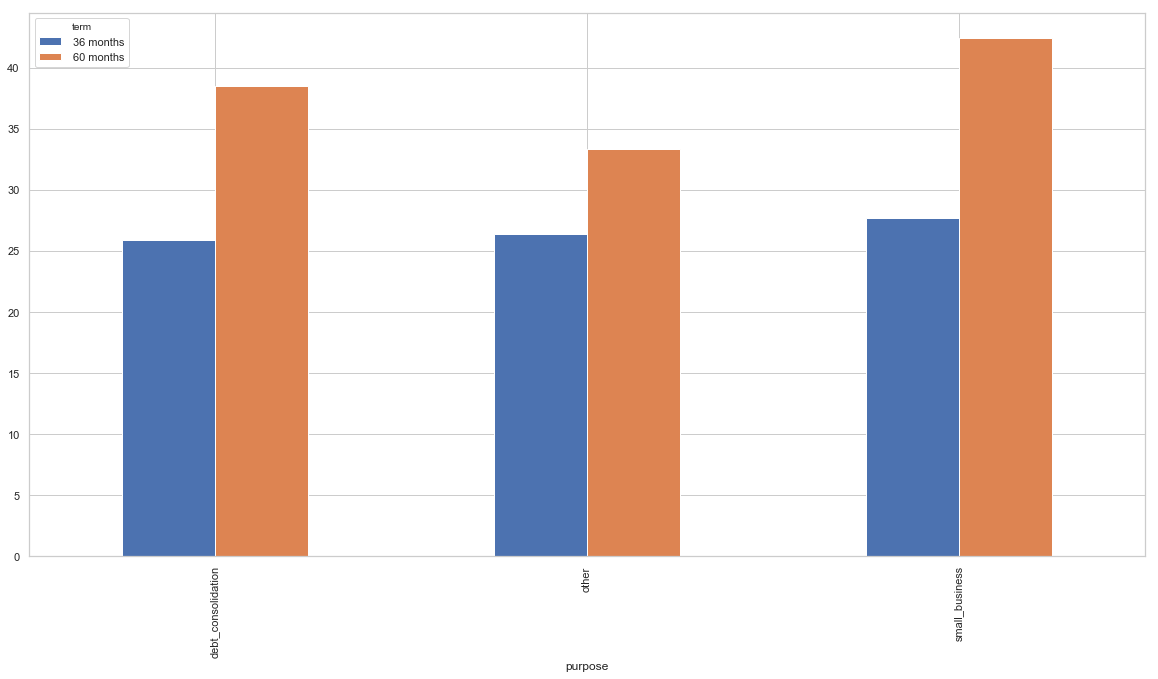

In [88]:
df_grouped = df_temp_grouped['Charged Off'].unstack()
df_grouped.plot(kind='bar')
plt.gcf().set_size_inches(20, 10)

In [89]:
df_temp_grouped[df_temp_grouped['Charged Off'] > 30]

,loan_status,Charged Off,Fully Paid
purpose,term,,
debt_consolidation,60 months,38.518519,61.481481
other,60 months,33.333333,66.666667
small_business,60 months,42.388060,57.611940


####  These customers are more likely to default when opting for a 60 months tenure.

In [90]:
df_temp1 = df_temp[df_temp['term'] == ' 60 months']
df_temp1.head()

,issue_d,funded_amnt_inv,int_rate,term,grade,sub_grade,annual_inc,dti,emp_length,home_ownership,loan_status,purpose,verification_status,issue_month,issue_year,counter
8,Dec-11,5600.0,21.28,60 months,F,F2,40000.0,5.55,4 years,OWN,Charged Off,small_business,Source Verified,12,11,1
61,Dec-11,8925.0,17.27,60 months,D,D3,40000.0,19.47,6 years,RENT,Fully Paid,small_business,Verified,12,11,1
68,Dec-11,8200.0,21.28,60 months,F,F2,75000.0,12.48,4 years,RENT,Charged Off,small_business,Source Verified,12,11,1
77,Dec-11,7175.0,21.67,60 months,F,F3,75000.0,24.82,< 1 year,RENT,Fully Paid,debt_consolidation,Verified,12,11,1
112,Dec-11,26800.0,20.89,60 months,F,F1,120000.0,12.15,3 years,MORTGAGE,Fully Paid,debt_consolidation,Verified,12,11,1


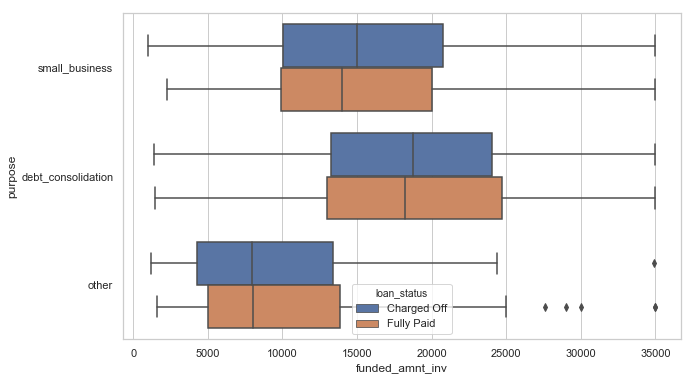

In [91]:
#Checking if amount funded has any effect on defaults
plt.figure(figsize=[10,6])
sns.boxplot(data=df_temp1, x='funded_amnt_inv', y='purpose', hue='loan_status')
plt.show()

The box plots are very identical for default and fully paid, and so this cannot be used to derive any conclusions

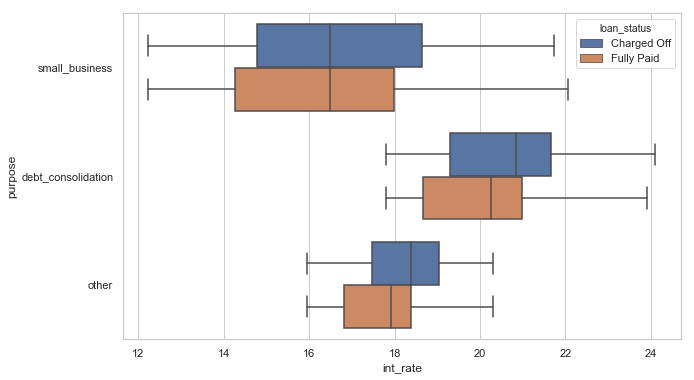

In [92]:
#Checking if interest has any effect on defaults
plt.figure(figsize=[10,6])
sns.boxplot(data=df_temp1, x='int_rate', y='purpose', hue='loan_status')
plt.show()

The charged-off customers seem to have a higher interest rate, though this is higher than that of the fully paid, it cannot be used to make conclusions since the gap is very small

In [97]:
df_temp_grouped = df_temp1.groupby(['sub_grade', 'purpose'])['loan_status'].value_counts().unstack()
df_temp_grouped = df_temp_grouped[df_temp_grouped.sum(axis=1) > 20]
df_temp_grouped

loan_status                   Charged Off  Fully Paid
sub_grade purpose                                    
C1        small_business             14.0        18.0
C3        small_business              9.0        15.0
D3        small_business             11.0        12.0
D4        small_business              8.0        13.0
D5        small_business             15.0         8.0
E1        other                       9.0        20.0
E2        other                       8.0        20.0
          small_business              7.0        14.0
E5        other                       6.0        15.0
F1        debt_consolidation         48.0        82.0
F2        debt_consolidation         35.0        64.0
F3        debt_consolidation         24.0        51.0
F4        debt_consolidation         33.0        35.0
F5        debt_consolidation         22.0        23.0
G1        debt_consolidation         14.0        24.0
G2        debt_consolidation         13.0        19.0
G3        debt_consolidation         12.0         9.0
G4        debt_consolidation          4.0        19.0

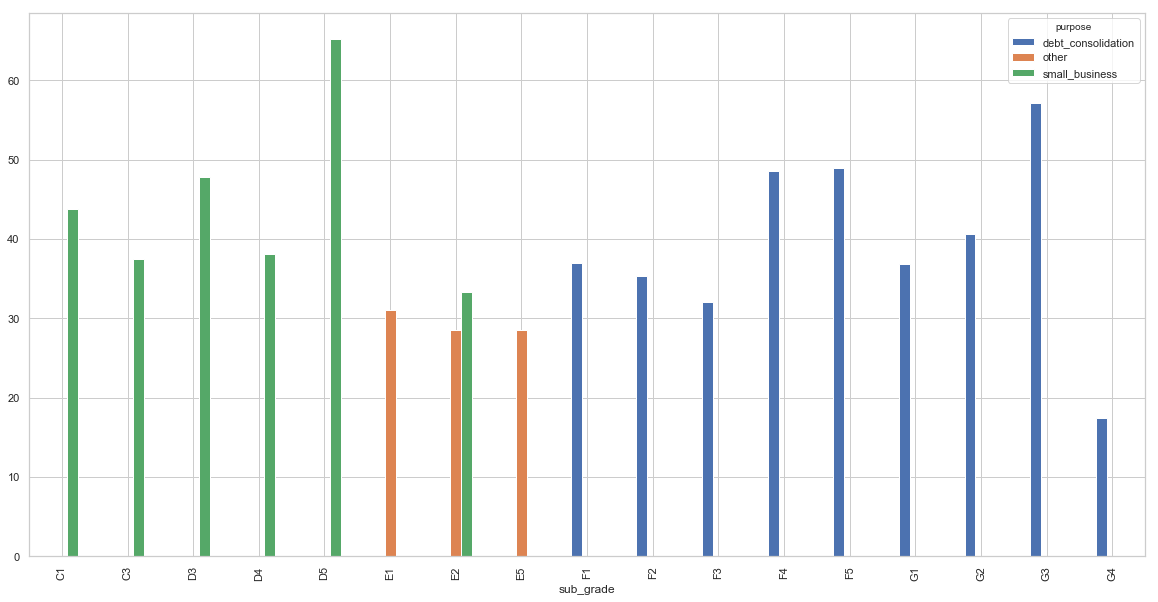

In [98]:
df_temp_grouped['Charged Off'] = df_temp_grouped['Charged Off']/df_temp_grouped.sum(axis=1) *100
df_temp_grouped['Fully Paid'] = df_temp_grouped['Fully Paid']/df_temp_grouped.sum(axis=1) *100
df_temp_grouped['Charged Off'].unstack().plot(kind='bar')
plt.gcf().set_size_inches(20, 10)

### Restricting the analysis to a minimum of 20 customers per category we observed
- sub-grade D5 for small business has ~65% default rate, followed by G3 for debt consolidation at ~57% default rate.
- D3 for small business and F4, F5 for debt consolidation have very close to 50% default rates.

### Generating correlation matrix 

In [ ]:
cont_cols = ['funded_amnt_inv', 'int_rate', 'annual_inc', 'dti']
cat_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'loan_status', 'purpose', 'verification_status']

In [ ]:
df_test = df_temp1.copy()

In [ ]:
df_test = df_test[cont_cols + cat_cols]
df_test.head()

In [ ]:
## Converting the categorical variables to continous by assigning a number.
for cols in cat_cols:
    count = 1
    data_dict = dict()
    for val in list(df_test[cols].unique()):
        data_dict[val] = count
        count += 1
    
    df_test[cols] = df_test[cols].map(data_dict)
    
df_test.head()

In [ ]:
plt.figure(figsize=[14,10])
sns.heatmap(df_test.corr(), cmap='Greens', annot=True)
plt.show()

- The correlation matrix doesn't show a huge relation of any variable with loan status and so no single variable can decide if the loan would be default or completed.
- It shows a general trend of different variable among each other such as:
    - Interest rate with Grade
    - Interest rate and annual income
    - Interest rate and Term
    - Amount funded and loan term
    - Annual income and home ownership
    - Funded amount and verification status